# EDA (I'll do just one league)

General League Statistics

In [8]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings("ignore")

In [3]:
data = pd.read_csv("../initial_data/leagues/premier_league_stats.csv")

In [6]:
total_matches = data["Played"].sum() // 2
avg_wins  = data["Won"].mean()
avg_losses = data["Lost"].mean()
total_goals = data["Goals For"].sum()
avg_goals_per_match = total_goals / total_matches
total_conceded = data["Goals Against"].sum()
avg_conceded_per_match = total_conceded / total_matches

goal_difference_dist = data["Goal Difference"].describe()

home_performance = data[["Home Played", "Home Wins", "Home Losses", "Home GF", "Home GA"]].mean()
away_performance = data[["Away Played", "Away Wins", "Away Losses", "Away GF", "Away GA"]].mean()

Point Distribution

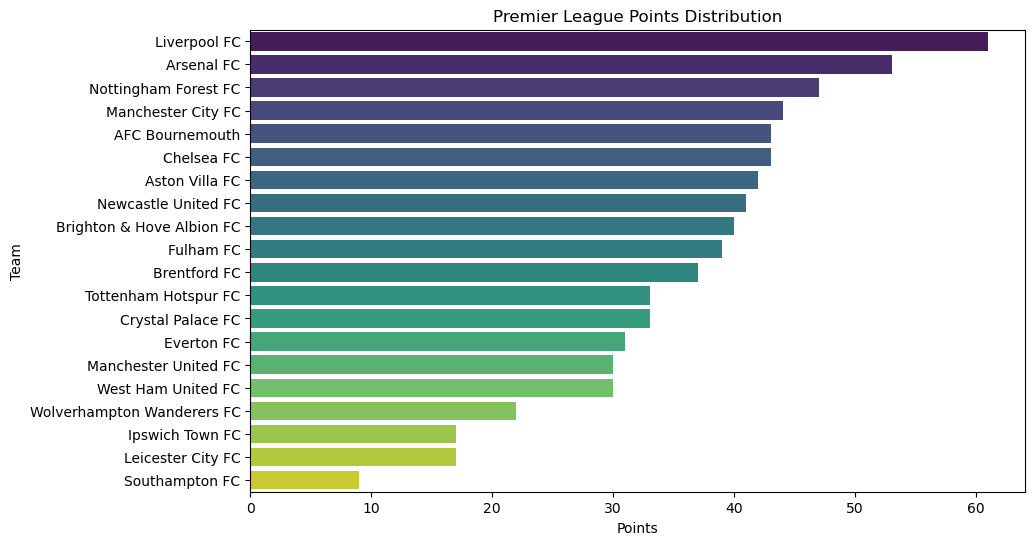

In [9]:
data_sorted = data.sort_values(by="Points", ascending=False)


plt.figure(figsize=(10, 6))
sns.barplot(x="Points", y="Team", data=data_sorted, palette="viridis")
plt.title("Premier League Points Distribution")
plt.xlabel("Points")
plt.ylabel("Team")
plt.show()

Goal Difference Distribution

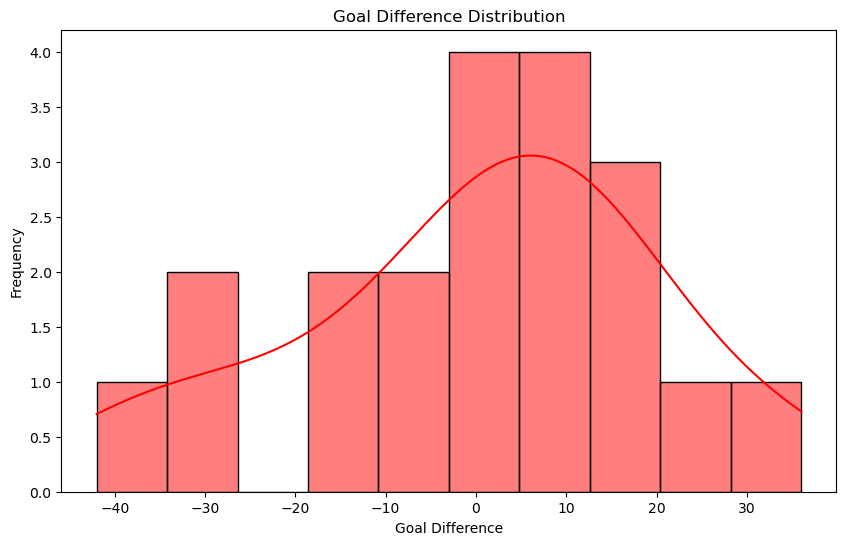

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(data["Goal Difference"], bins=10, kde=True, color="red")
plt.xlabel("Goal Difference")
plt.ylabel("Frequency")
plt.title("Goal Difference Distribution")
plt.show()

Home and Away Performance

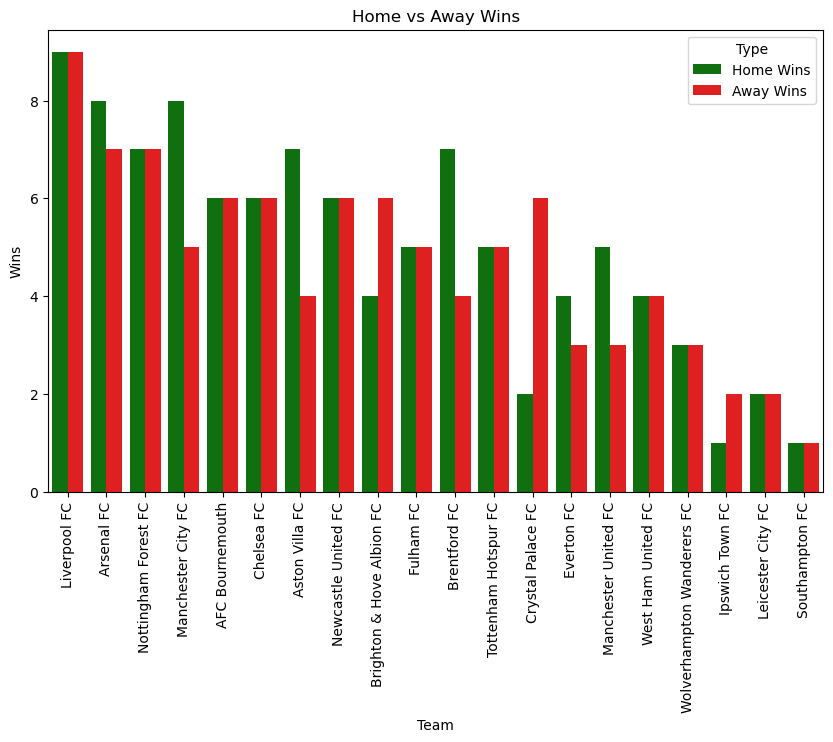

In [18]:
home_away = data[["Team", "Home Wins", "Away Wins"]].melt(id_vars="Team", var_name="Type", value_name="Wins")

plt.figure(figsize=(10, 6))
sns.barplot(x="Team", y="Wins", hue="Type", data=home_away, palette=["green", "red"])
plt.title("Home vs Away Wins")
plt.xlabel("Team")
plt.xticks(rotation=90)
plt.ylabel("Wins")
plt.show()

Goals For and Against 

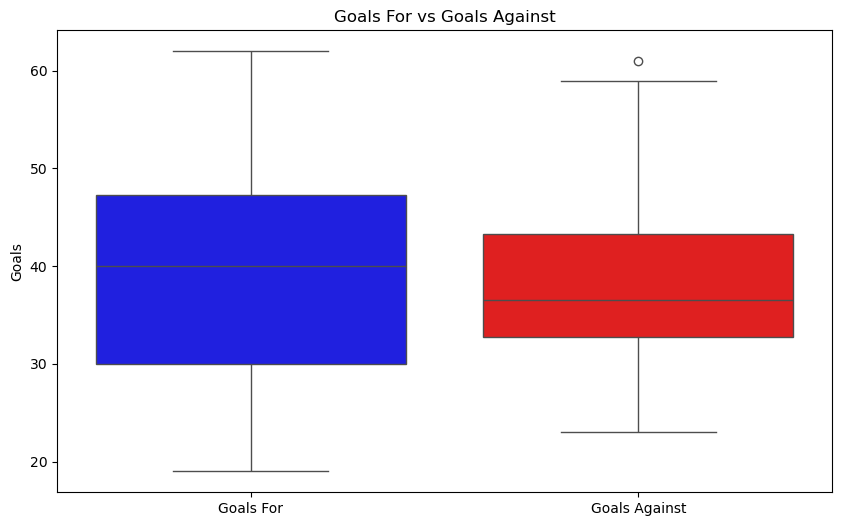

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[["Goals For", "Goals Against"]], palette=["blue", "red"])
plt.title("Goals For vs Goals Against")
plt.xticks(ticks=[0, 1], labels=["Goals For", "Goals Against"])
plt.ylabel("Goals")
plt.show()

Point vs Goal Difference

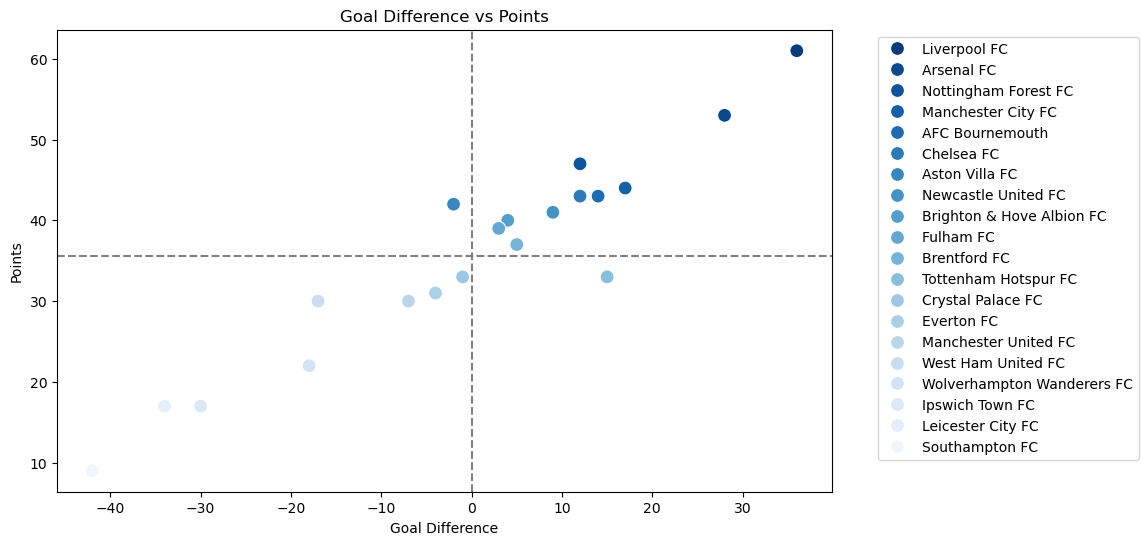

In [30]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data["Goal Difference"], y=data["Points"], hue=data["Team"], palette="Blues_r", s=100)
plt.title("Goal Difference vs Points")
plt.xlabel("Goal Difference")
plt.ylabel("Points")
plt.axhline(data["Points"].mean(), color="gray", linestyle="--")
plt.axvline(data["Goal Difference"].mean(), color="gray", linestyle="dashed")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()